<a href="https://colab.research.google.com/github/enikolaev/ML_and_NN/blob/main/Practical_Work_Clusterization_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Модели кластеризации

## Импорт модулей

In [1]:
import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

## Работа с датасетом

### Получение данных Ирисы Фишера

In [2]:
iris= datasets.load_iris()
print(iris.data.shape, type(iris.data))

(150, 4) <class 'numpy.ndarray'>


### Анализ dataset'а

In [3]:
iris_frame = pd.DataFrame(iris.data, columns=['fiture1', 'fiture2', 'fiture3', 'fiture4'])
iris_frame['target'] = iris.target
iris_frame.tail()

,fiture1,fiture2,fiture3,fiture4,target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [4]:
iris_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   fiture1  150 non-null    float64
 1   fiture2  150 non-null    float64
 2   fiture3  150 non-null    float64
 3   fiture4  150 non-null    float64
 4   target   150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


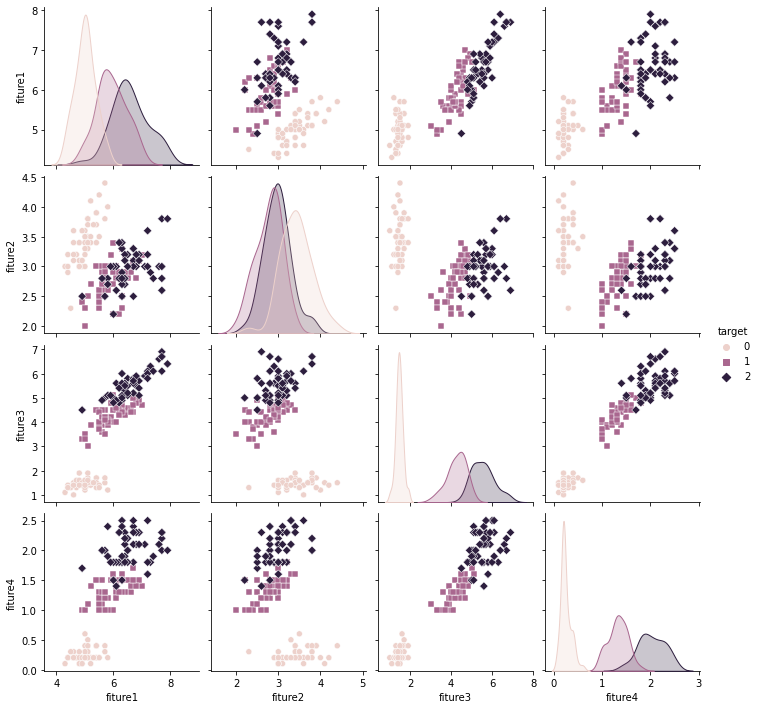

In [5]:
sb.pairplot(iris_frame, hue='target', markers=["o", "s", "D"])

## Кластеризация (набор данных ирисов Фишера)

### Обучение модели кластеризации K-средних

In [6]:
from sklearn import cluster
# задаем количество кластеров, равное 3
k=3
k_means = cluster.KMeans(k)
# обучение
k_means.fit(iris.data)
# результат кластеризации
print( k_means.labels_[::10])
print( iris.target[::10])
result=k_means.predict([[ 15.0, 13.6, 11.3, 10.25],[ 5.0, 3.6, 1.3, 0.25]])
print(result)

[1 1 1 1 1 2 2 2 2 2 0 0 0 0 0]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
[0 1]


### Метрики качества кластеризации

In [7]:
from sklearn import metrics
#внутренняя метрика
print(metrics.silhouette_score(iris.data, k_means.labels_))
#внешняя метрика
print(metrics.adjusted_rand_score(iris.target, k_means.labels_))

0.5528190123564095
0.7302382722834697


### Анализ границ кластеризации

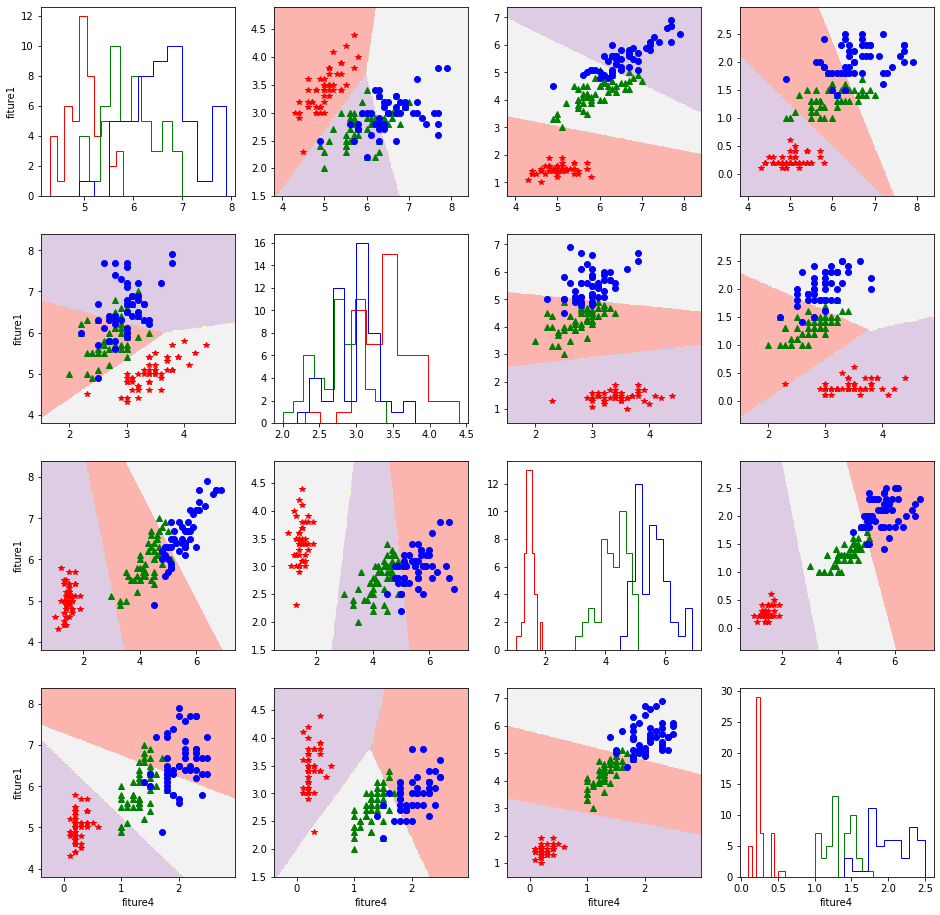

In [8]:
dX = iris_frame.iloc[:,0:4]
dy = iris_frame.iloc[:,4]

plot_markers = ['r*', 'g^', 'bo']
answers = dy.unique()

# Создаем подграфики для каждой пары признаков
f, places = plt.subplots(4, 4, figsize=(16,16))

fmin = dX.min()-0.5
fmax = dX.max()+0.5
plot_step = 0.02  

# Обходим все subplot
for i in range(0,4):
    for j in range(0,4):

        # Строим решающие границы 
        if(i != j):
            xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
                               np.arange(fmin[j], fmax[j], plot_step))
            model = k_means
            model.fit(dX.iloc[:, [i,j]].values)
            p = model.predict(np.c_[xx.ravel(), yy.ravel()])
            p = p.reshape(xx.shape)
            places[i,j].contourf(xx, yy, p, cmap='Pastel1') 
      
        # Обход всех классов
        for id_answer in range(len(answers)):
            idx = np.where(dy == answers[id_answer])
            if i==j:
                places[i, j].hist(dX.iloc[idx].iloc[:,i],
                                  color=plot_markers[id_answer][0],
                                 histtype = 'step')
            else:
                places[i, j].plot(dX.iloc[idx].iloc[:,i], dX.iloc[idx].iloc[:,j], 
                                  plot_markers[id_answer], 
                                  label=answers[id_answer], markersize=6)
        
        if j==0:
            places[i, j].set_ylabel(dX.columns[j])
        
        if i==3:
            places[i, j].set_xlabel(dX.columns[i])

## Кластеризация (набор данных Клиенты компании)

### Получение данных из удвленного источника

In [20]:
## Загрузка данных
url='https://raw.githubusercontent.com/enikolaev/ML_and_NN/main/data/Mall_Customers.csv'
dataset = pd.read_csv(url)
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


В качестве обучающей выборки будем использовать последние два столбца набора данных

In [42]:
X = dataset.iloc[:, [3, 4]].values
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

### Определение оптимального количества кластеров

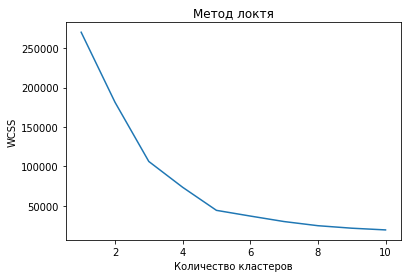

In [22]:
# Использование elbow method для поиска оптимального количества кластеров
from sklearn.cluster import KMeans
# Within Clusters Sum of Squares (WCSS)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

### Обучение K-средних модели для оптимального количества кластеров

In [23]:
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

### Визуализация результатов

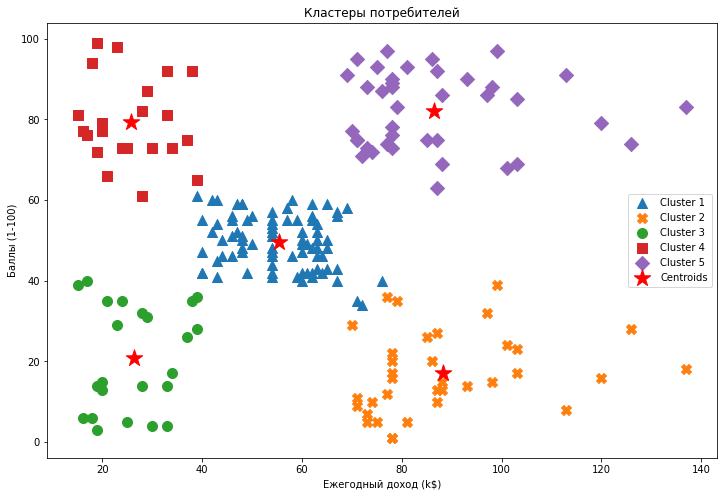

In [38]:
plt.figure(figsize=(12,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, marker='^', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, marker='X', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, marker='o', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, marker='s', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, marker='D', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s = 300, c = 'red', label = 'Centroids')
plt.title('Кластеры потребителей')
plt.xlabel('Ежегодный доход (k$)')
plt.ylabel('Баллы (1-100)')
plt.legend()
plt.show()

## Индивидуальное задание

После изучения и выполнения, представленных в данной работе приемов кластеризации, необходимо раелизовать следующие пункты:


*   выбрать свой собственный набор данных для кластеризации (синтетический или из внешнего источника)
*   выбрать метод кластеризации (для выбора модели можно воспользоваться источником [Tutorial on sklearn.cluster](https://scikit-learn.ru/clustering/))
* реализовать алгоритм кластеризации и аналих результатов
* сохранить Python Notebook в виде PDF-документа и загрузить полученный отчет в систему дистанционного обучения



